In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
start = '2013-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [35]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...
2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800


In [36]:
data.reset_index(inplace = True)

In [37]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2757,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
2758,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
2759,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
2760,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [38]:
ma_100_days = data.Close.rolling(100).mean()

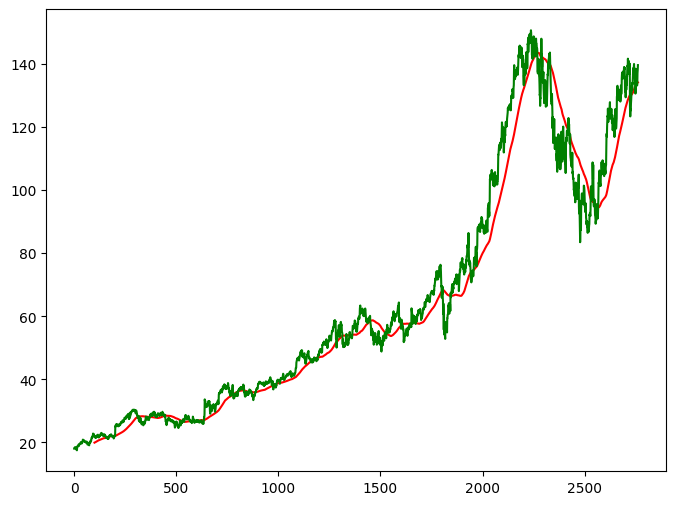

In [39]:
plt.figure(figsize = (8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [40]:
ma_200_days = data.Close.rolling(200).mean()

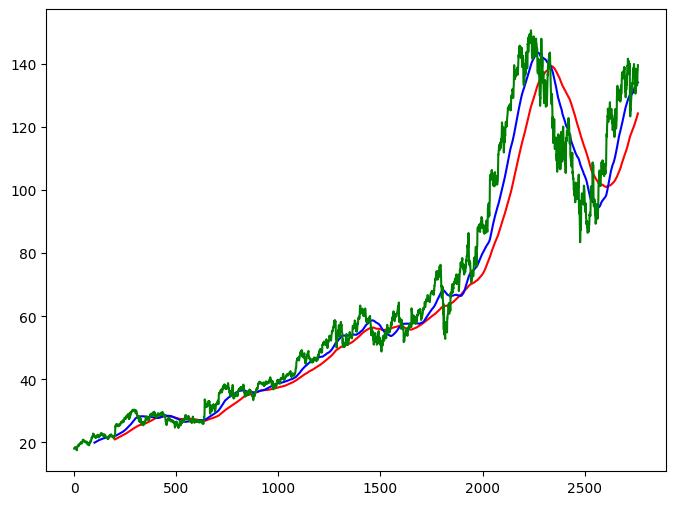

In [41]:
plt.figure(figsize = (8,6))
plt.plot(ma_200_days, 'r')
plt.plot(ma_100_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [42]:
data.dropna(inplace = True)


In [43]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [44]:
data_train.shape[0]

2209

In [45]:
data_test.shape[0]

553

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [47]:
data_train_scale = scaler.fit_transform(data_train)

In [48]:
x =[]
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [49]:
x,y = np.array(x), np.array(y)

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential 

In [51]:
model  = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


C:\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - loss: 0.0479
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 0.0047
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 0.0041
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0035
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 162ms/step - loss: 0.0038
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0034
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - loss: 0.0035
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0030
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - loss: 0.0026
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 173ms/step - loss: 0.0025
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0022
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - loss: 0.0023
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - loss: 0.0021
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - loss: 0.0022
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 

In [54]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [55]:
pas_100_days = data_train.tail(100)

In [56]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [57]:
data_test

,Close
0,115.435501
1,117.804497
2,117.254997
3,120.333504
4,120.453499
...,...
648,133.199997
649,133.839996
650,137.190002
651,138.100006


In [58]:
data_test_scale = scaler.fit_transform(data_test)

In [59]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [60]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step


In [61]:
y_predict

array([[0.8121011 ],
       [0.8101947 ],
       [0.80953336],
       [0.80966973],
       [0.8107246 ],
       [0.8128366 ],
       [0.81611764],
       [0.8205782 ],
       [0.8258229 ],
       [0.83142453],
       [0.8363859 ],
       [0.8400235 ],
       [0.84218884],
       [0.8438823 ],
       [0.84598213],
       [0.84921414],
       [0.85326207],
       [0.857924  ],
       [0.86309105],
       [0.86884326],
       [0.8752106 ],
       [0.88206655],
       [0.8891398 ],
       [0.895747  ],
       [0.9013837 ],
       [0.90620315],
       [0.91041416],
       [0.9141356 ],
       [0.91743535],
       [0.9205741 ],
       [0.92362595],
       [0.92619526],
       [0.9279379 ],
       [0.92871875],
       [0.92808414],
       [0.9262953 ],
       [0.92332685],
       [0.9191705 ],
       [0.91429603],
       [0.90906256],
       [0.9039416 ],
       [0.8998322 ],
       [0.89740497],
       [0.8968466 ],
       [0.8980615 ],
       [0.9004518 ],
       [0.90314907],
       [0.905

In [62]:
scaler.scale_

array([0.01487675])

In [63]:
scale =1/scaler.scale_

In [64]:
y_predict = y_predict*scale

In [65]:
y = y*scale

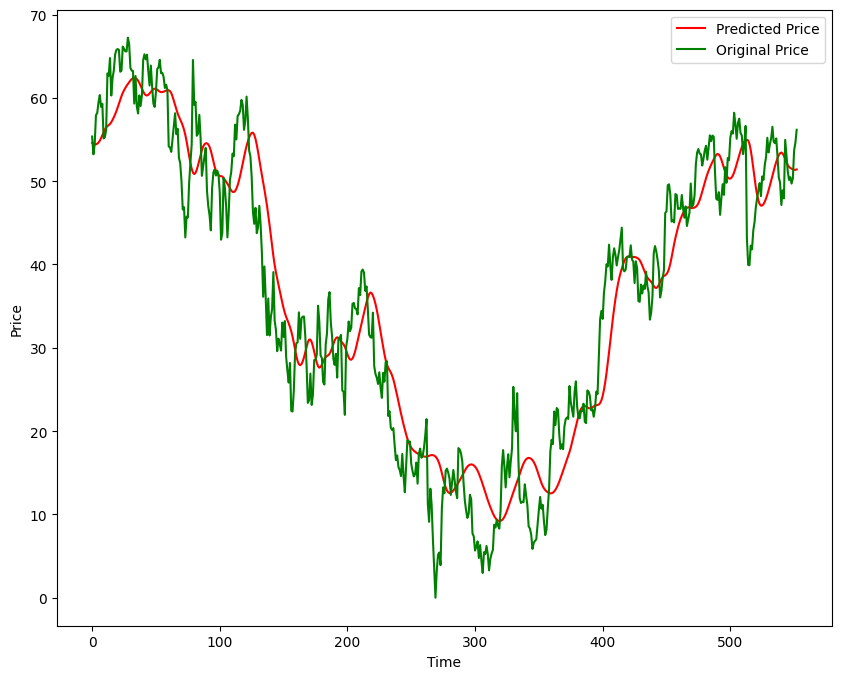

In [66]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [67]:
model.save('Stock Prediction Model.keras')

In [68]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Generate synthetic data
np.random.seed(42)
X_train = np.random.rand(1000, 20)
X_test = np.random.rand(200, 20)
y_train = np.random.randint(2, size=1000)
y_test = np.random.randint(2, size=200)

# Define your neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1 * 100)

C:\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Accuracy: 53.5
Precision: 61.29032258064516
Recall: 35.51401869158878
F1 Score: 44.97041420118343
